# Grover algorithm

## Spectral gap

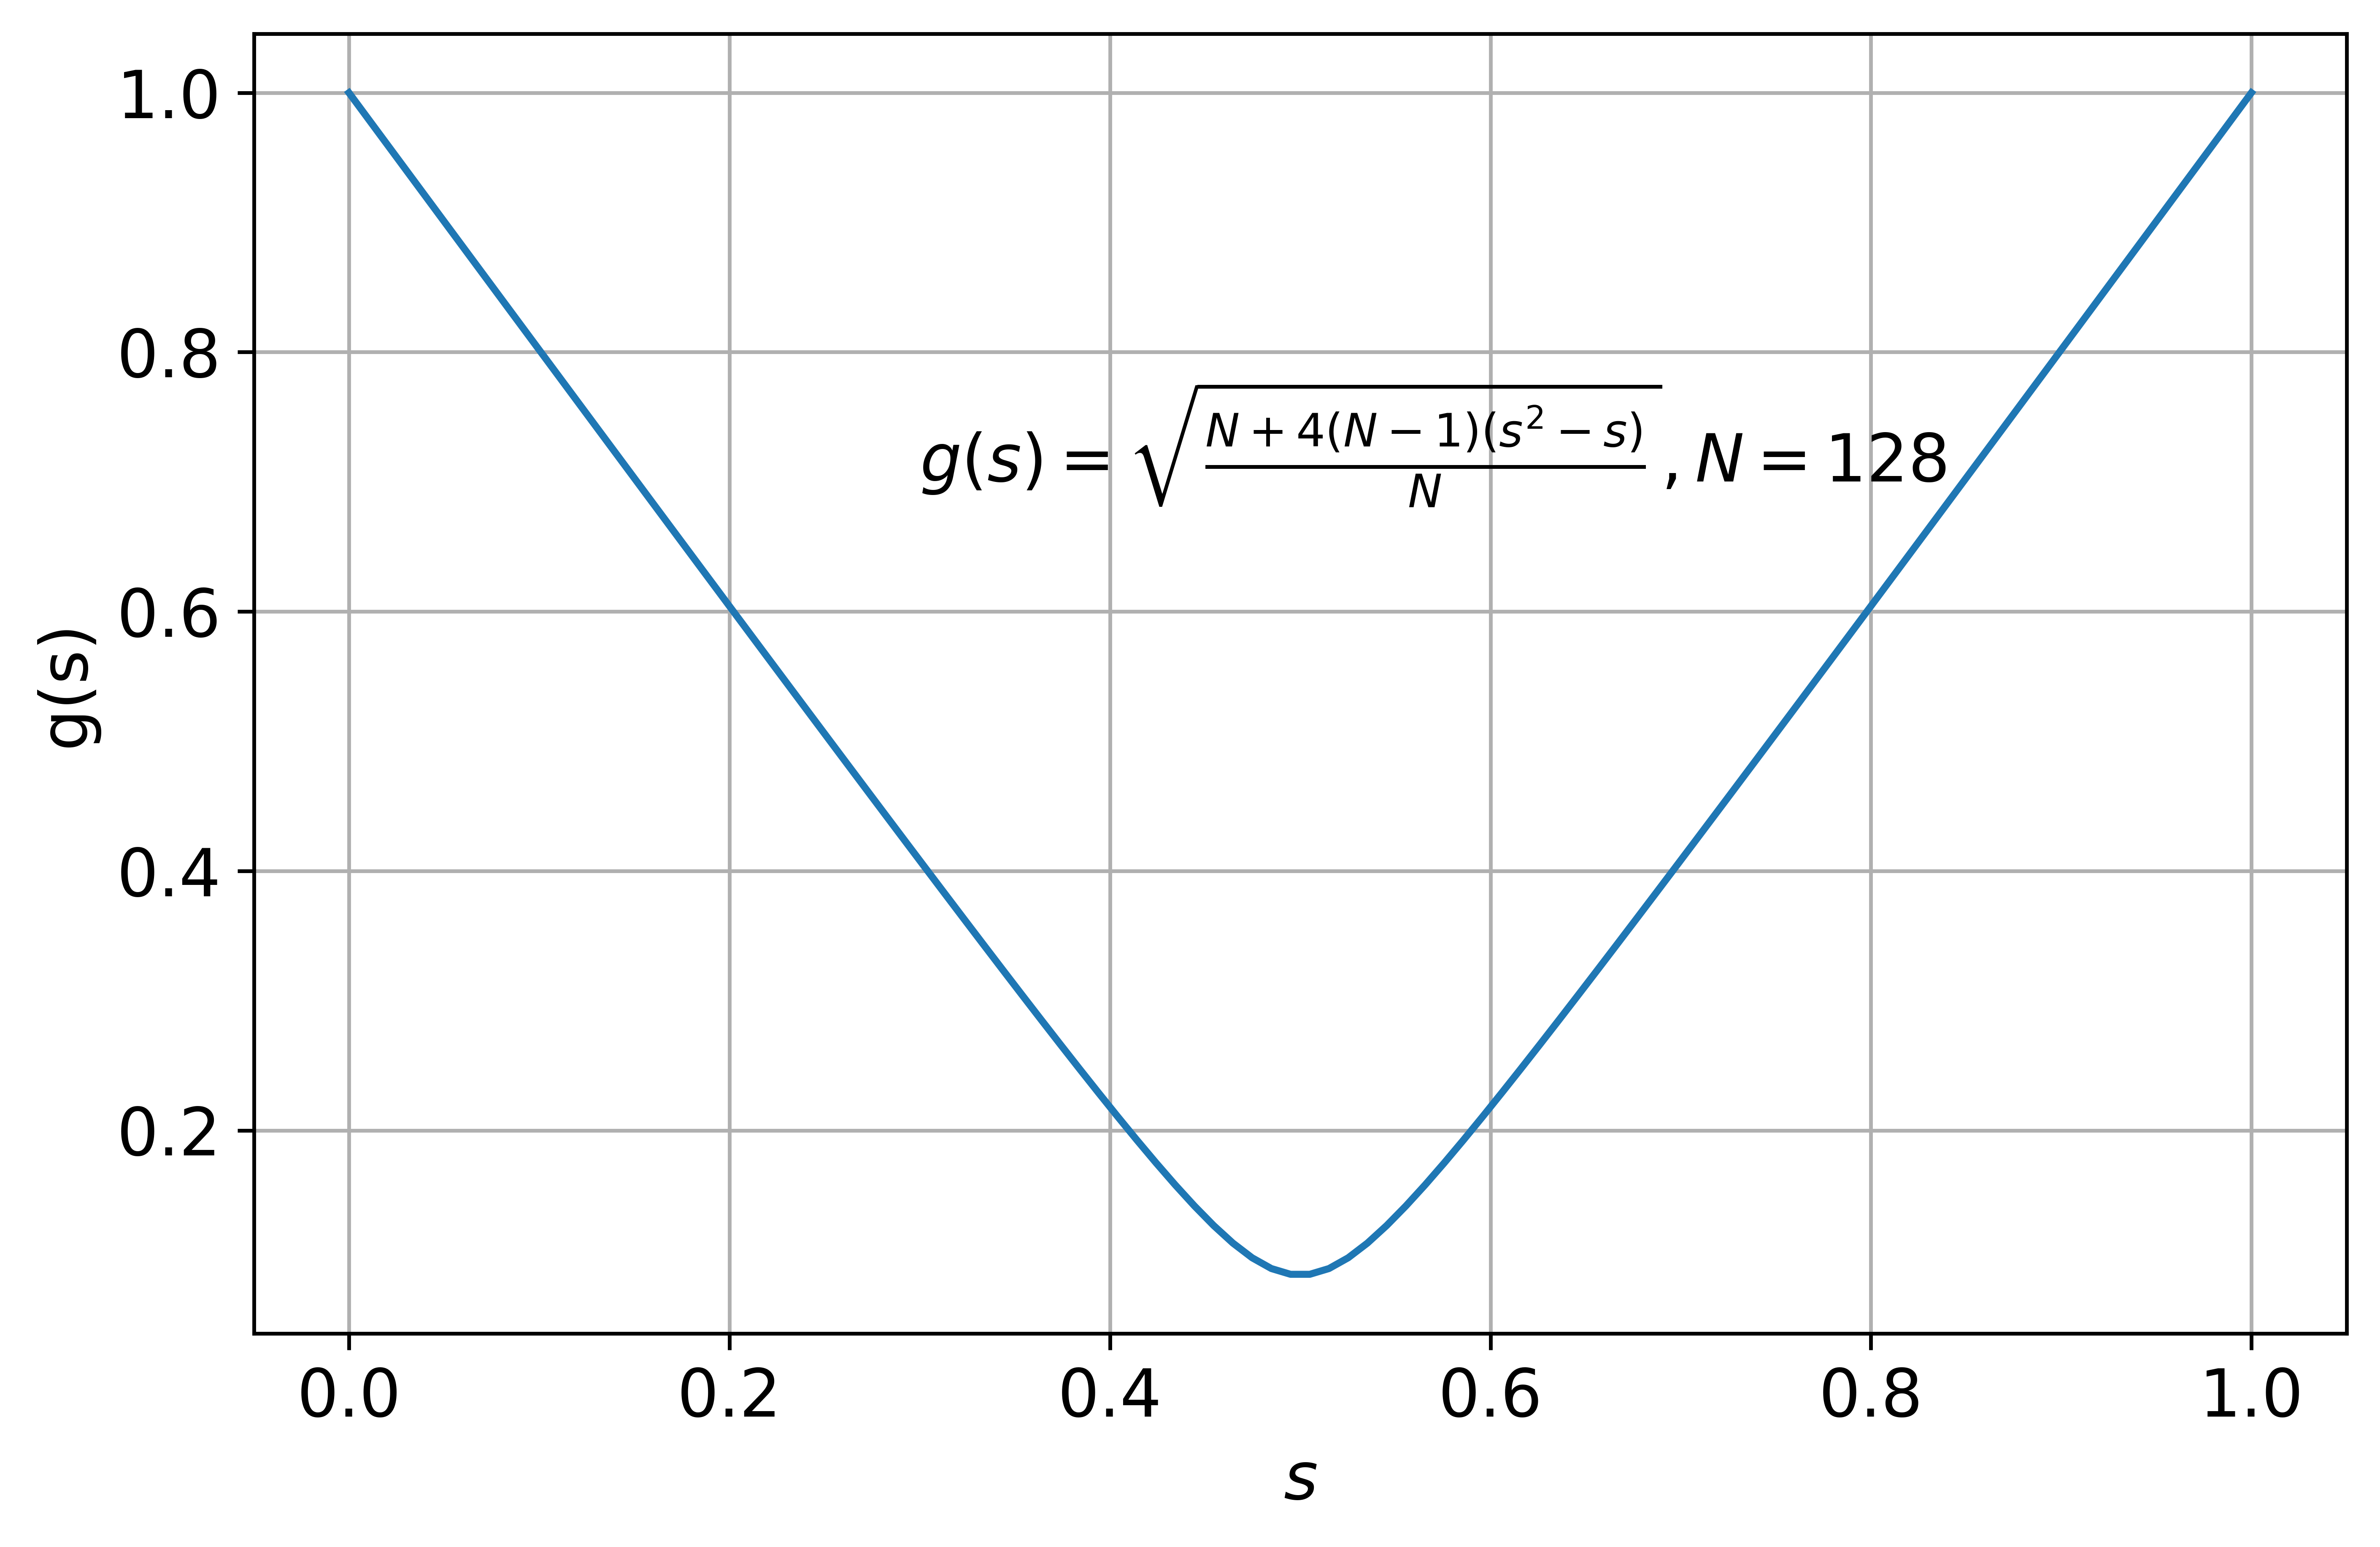

In [1]:
import numpy as np
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 400

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes

fig, ax = plt.subplots(figsize=(8, 5))
s = np.linspace(0,1,100)
N = 128
y1= np.sqrt((N+4*(N-1)*(s**2-s))/N)

ax.plot(s, y1, '-')
# ax.plot(s, y2, 'r--')

# ax.set_xlim(0, 7)
# ax.set_ylim(-1, 1.5)
ax.set_xlabel(r'$ s $')
ax.set_ylabel('g(s)')
# ax.set_title('Title')
ax.text(0.3, 0.7, r'$g(s) = \sqrt{\frac{N+4(N-1)(s^2-s)}{N}}, N=128$')
# ax.legend(('1', '2', '3', '4'), loc='upper right')
plt.grid(True)
fig.savefig('grover_spectrum.pdf', transparent=True, dpi=400)

## Grover algorithm in different framework

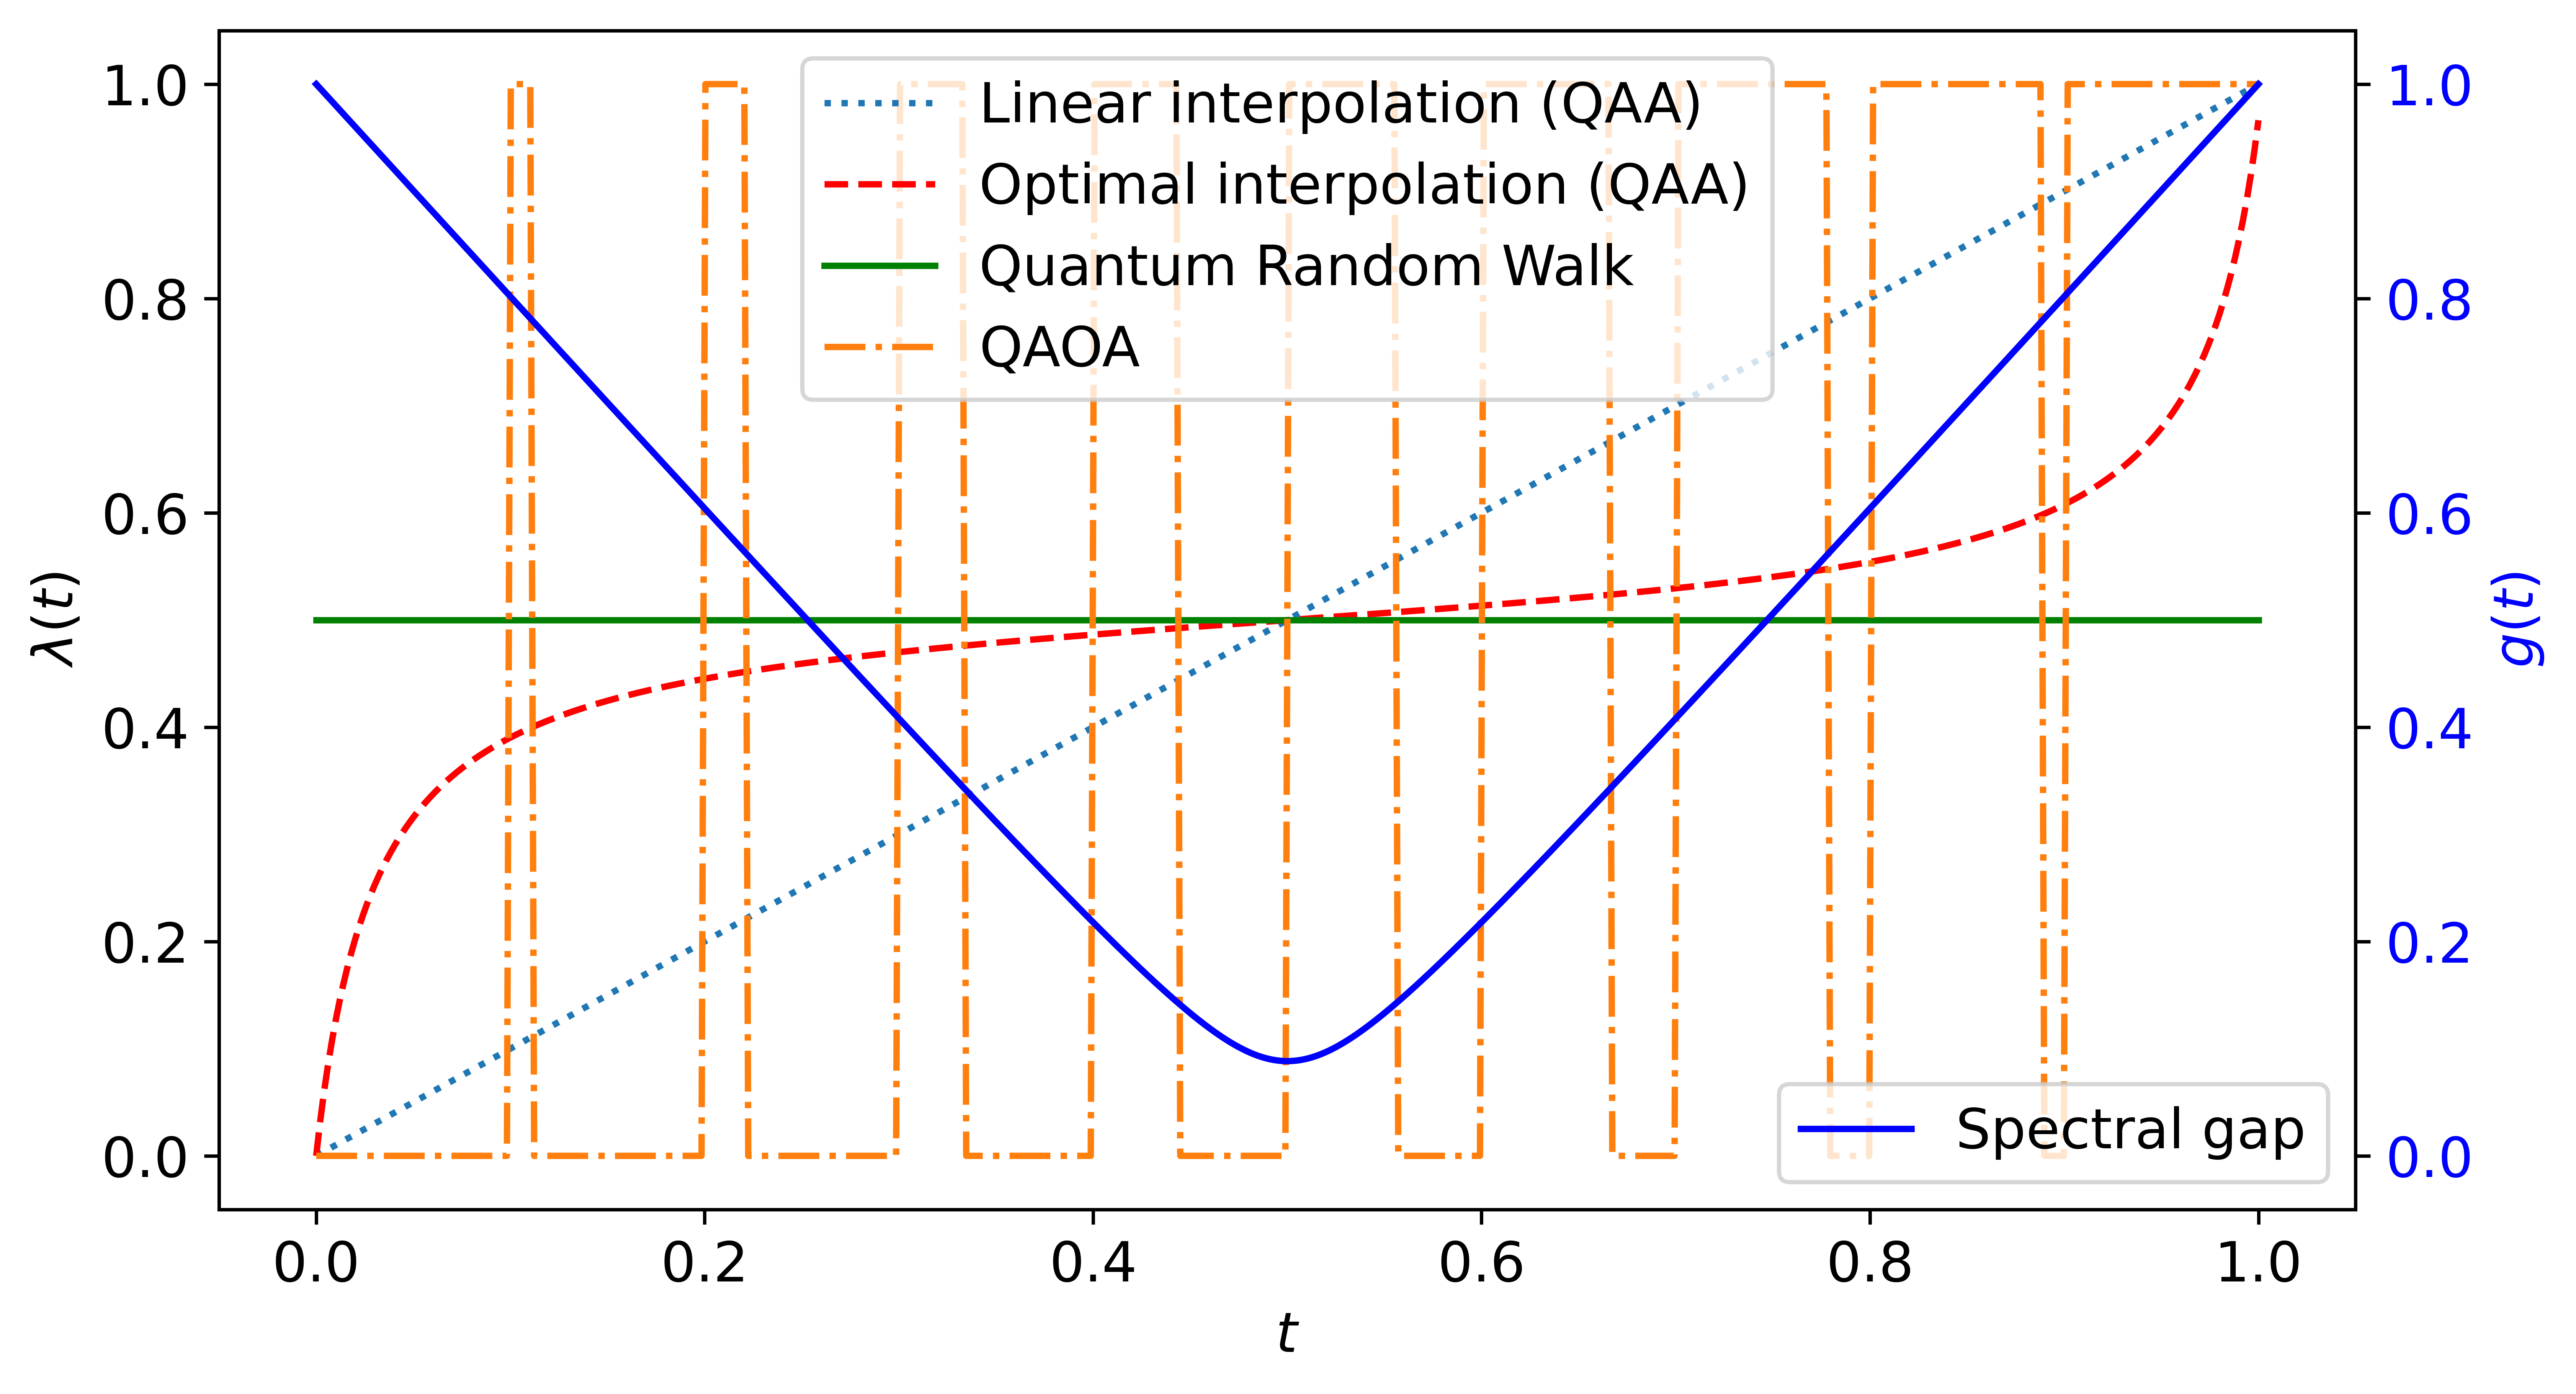

In [2]:
import numpy as np
import matplotlib as mpl

from scipy import signal

mpl.rcParams['figure.dpi'] = 400

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 13
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes

fig, ax = plt.subplots(figsize=(9, 5))
num_point = 500
s = np.linspace(0,1,num_point)
N = 128
y1= s
y2= 0.5*(np.tan(2*s*16.8*np.sqrt(N-1)/N-np.arctan(np.sqrt(N-1)))/(np.sqrt(N-1)) +1)
y3= 0.5*np.full(num_point, 1)
y4= (signal.square(2 * np.pi * 10 * s, duty=s)+1)/2
y5= np.sqrt((N+4*(N-1)*(s**2-s))/N)

ax.plot(s, y1, ':')
ax.plot(s, y2, 'r--')
ax.plot(s, y3, 'g-')
ax.plot(s, y4, '-.')

ax2 = ax.twinx()
ax2.plot(s, y5, 'b-', label='Spectral gap')
ax2.set_ylim(-0.05, 1.05)

# ax.set_xlim(0, 7)
# ax.set_ylim(-1, 1.5)
ax.set_xlabel(r'$ t $')
ax.set_ylabel('$\lambda(t)$')

ax2.set_ylabel('$g(t)$',color='b')
ax2.tick_params(axis='y', labelcolor='b')

# ax.set_title('Title')
# ax.text(0.2, 0.1, r'$s = \frac{\tan(2t\epsilon\sqrt{N-1}/N-arctan(\sqrt{n-1}))/\sqrt{N-1}+1}{2}, N=128,\epsilon=$')
# ax.text(0.2, 0.1, r'$N=128,\epsilon=$')
ax.legend(('Linear interpolation (QAA)', 'Optimal interpolation (QAA)', 'Quantum Random Walk', 'QAOA'), loc='upper center')
ax2.legend(loc='lower right')
# plt.grid(True)
fig.savefig('grover_qaoa_qaa.pdf', transparent=True, dpi=400)

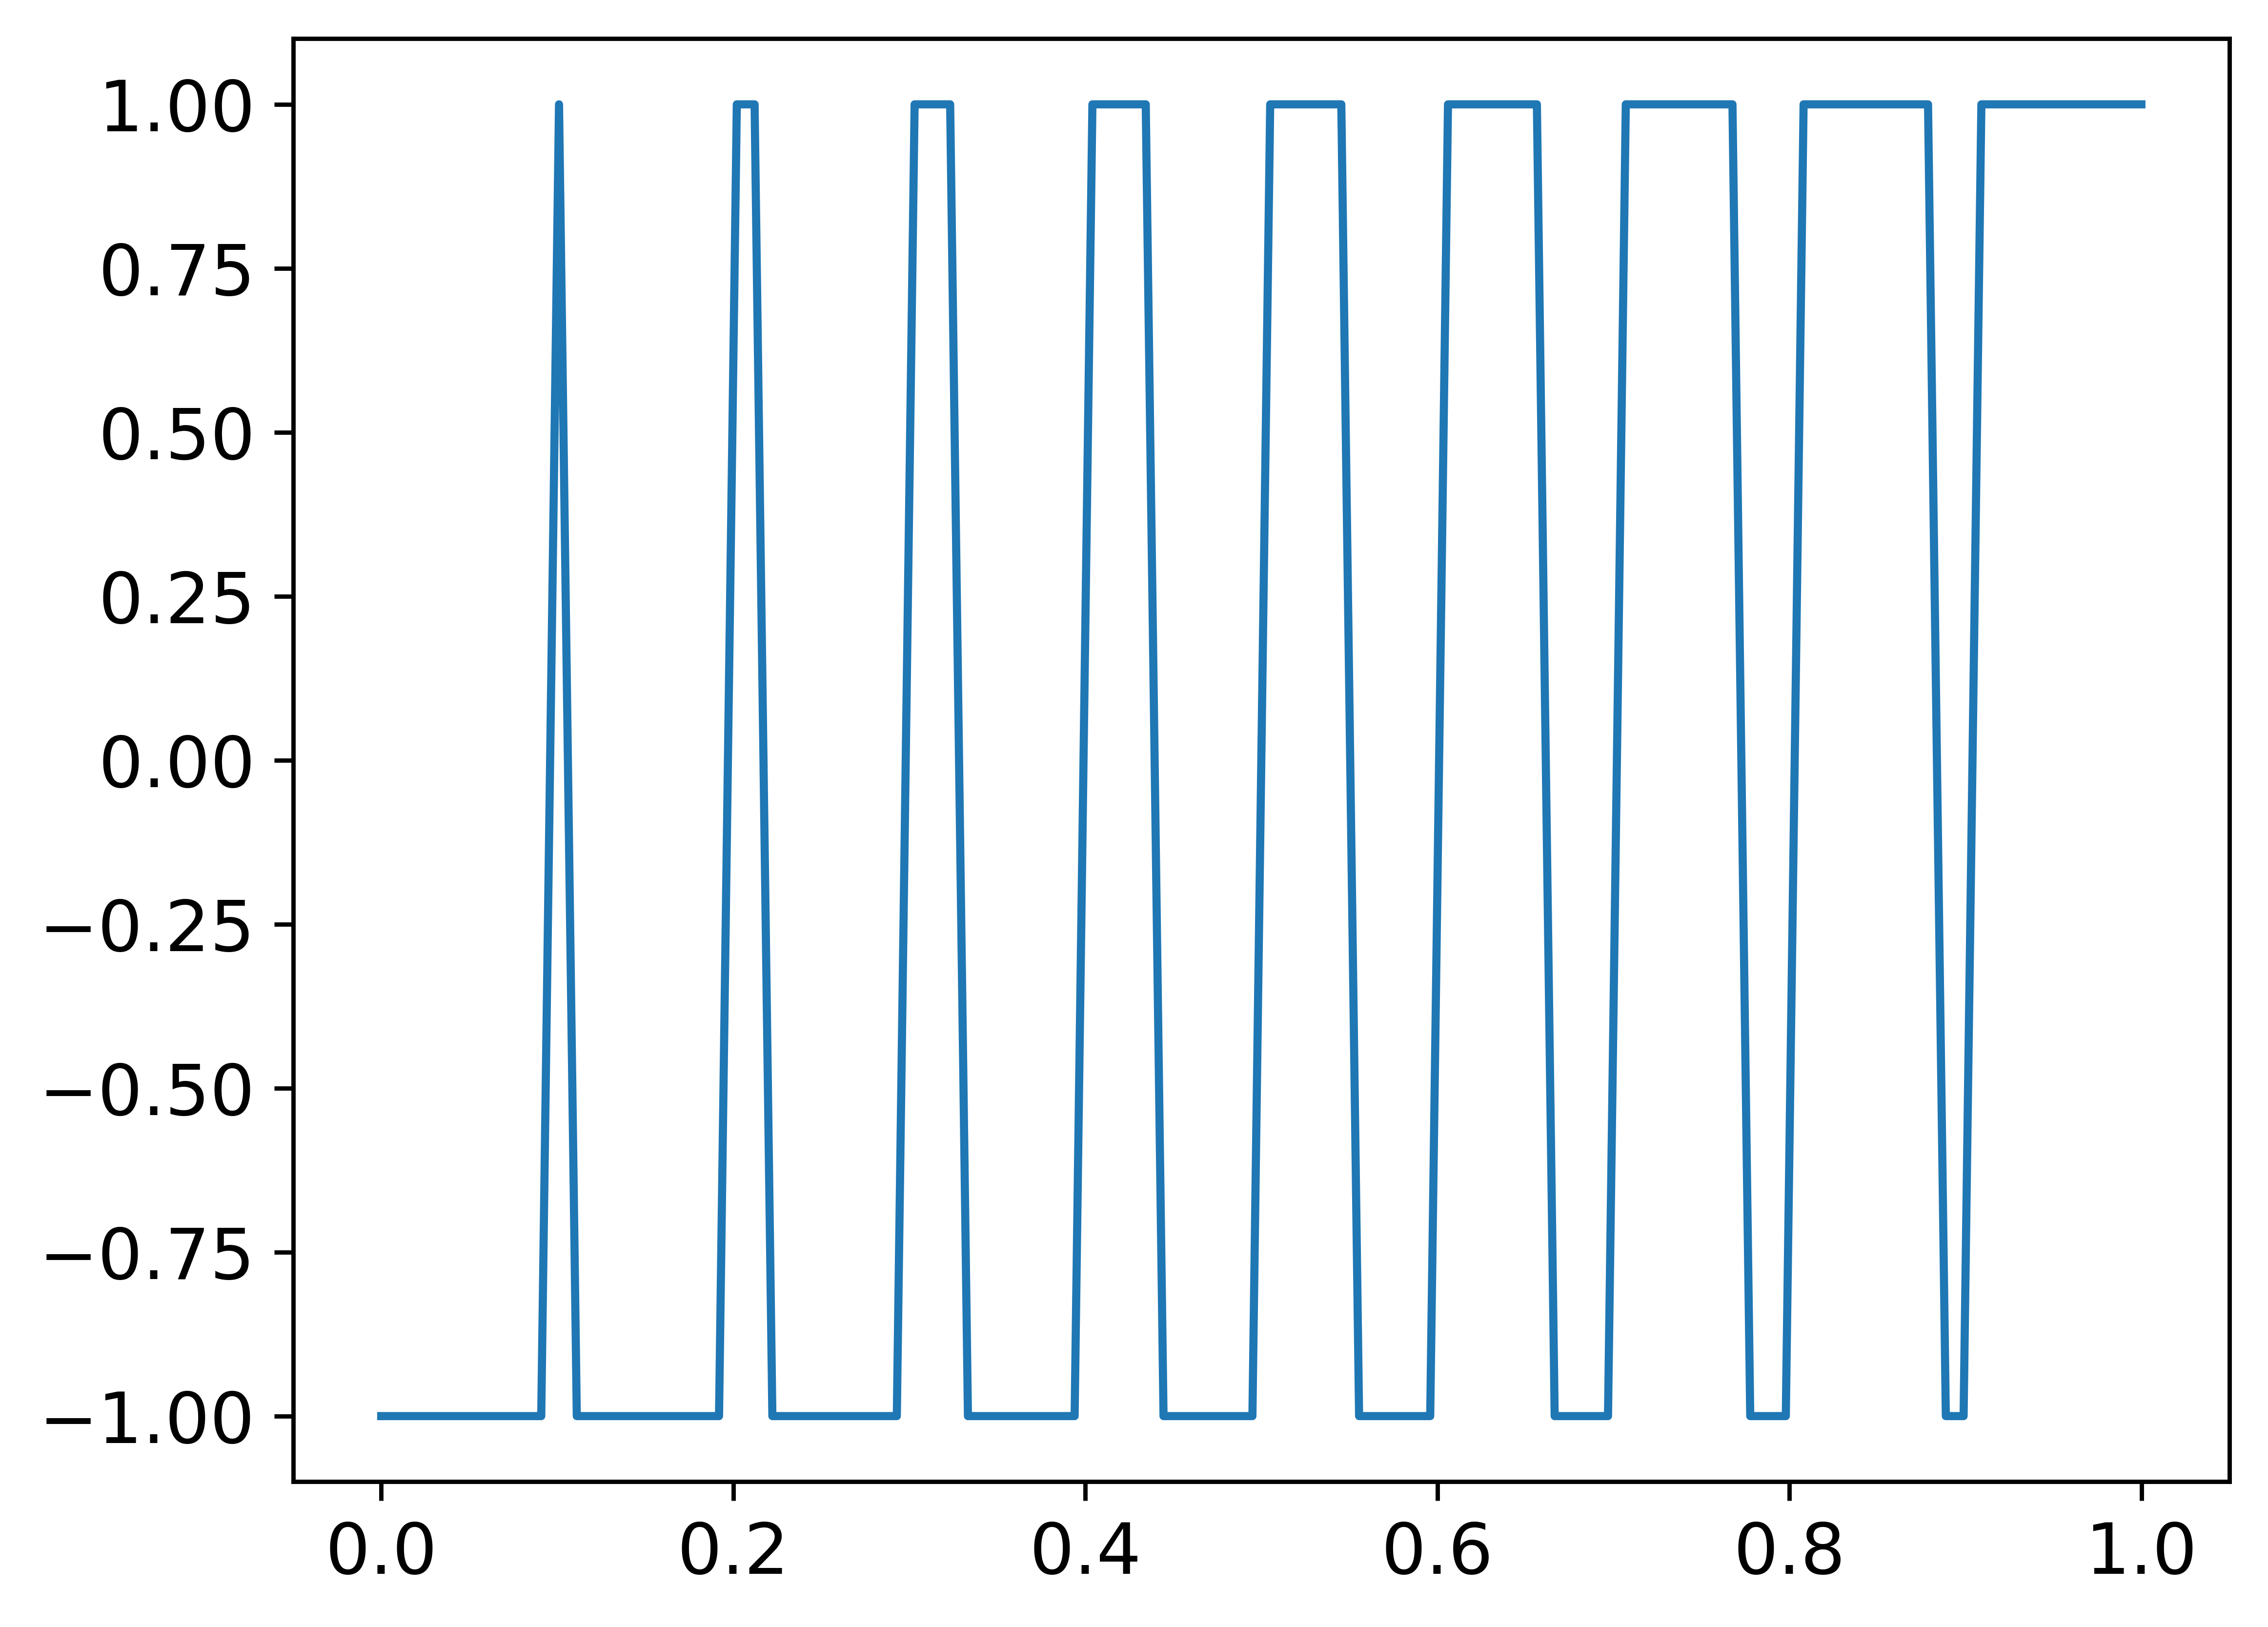

In [3]:
# Plot the square wave
s = np.linspace(0,1,100, endpoint = True)
plt.plot(s, (signal.square(2 * np.pi * 10 * s, duty=s)))